In [2]:
!pip install numpy pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.0 MB 5.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.0 MB 4.5 MB/s eta 0:00:03
   ------- -------------------------------- 2.1/11.0 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 3.1/11.0 MB 3.8 MB/s eta 0:00:03
   ------------- -------------------------- 3.7/11.0 MB 3.8 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.0 MB 3.4 MB/s eta 0:00:02
   -------------------- ------------------- 5.5/11.0 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 5.8/11.0 MB 3.6 MB/s eta 0:00:02
   ----------------------- ---------------- 6.6/11.0 MB 3.5 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.0 MB 3.5 MB/s eta 0:00:02
   -------------------------- ------------- 7.3/11.0 MB 3.3 MB/s eta 0:00:02
   --

In [3]:
import numpy as np 
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.image as image

In [4]:
image_fp="./images"

In [8]:
images_names=[os.path.basename(file) for file in glob.glob(os.path.join(image_fp,'*.jpg'))]

In [10]:
images_names

['Abyssinian_1.jpg',
 'Abyssinian_10.jpg',
 'Abyssinian_100.jpg',
 'Abyssinian_101.jpg',
 'Abyssinian_102.jpg',
 'Abyssinian_103.jpg',
 'Abyssinian_104.jpg',
 'Abyssinian_105.jpg',
 'Abyssinian_106.jpg',
 'Abyssinian_107.jpg',
 'Abyssinian_108.jpg',
 'Abyssinian_109.jpg',
 'Abyssinian_11.jpg',
 'Abyssinian_110.jpg',
 'Abyssinian_111.jpg',
 'Abyssinian_112.jpg',
 'Abyssinian_113.jpg',
 'Abyssinian_114.jpg',
 'Abyssinian_115.jpg',
 'Abyssinian_116.jpg',
 'Abyssinian_117.jpg',
 'Abyssinian_118.jpg',
 'Abyssinian_119.jpg',
 'Abyssinian_12.jpg',
 'Abyssinian_120.jpg',
 'Abyssinian_121.jpg',
 'Abyssinian_122.jpg',
 'Abyssinian_123.jpg',
 'Abyssinian_124.jpg',
 'Abyssinian_125.jpg',
 'Abyssinian_126.jpg',
 'Abyssinian_127.jpg',
 'Abyssinian_128.jpg',
 'Abyssinian_129.jpg',
 'Abyssinian_13.jpg',
 'Abyssinian_130.jpg',
 'Abyssinian_131.jpg',
 'Abyssinian_132.jpg',
 'Abyssinian_133.jpg',
 'Abyssinian_134.jpg',
 'Abyssinian_135.jpg',
 'Abyssinian_136.jpg',
 'Abyssinian_137.jpg',
 'Abyssinian_138.

In [11]:
labels=[' '.join(name.split('_')[:-1:]) for name in images_names]

In [12]:
labels

['Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssinian',
 'Abyssini

In [15]:
def label_encode(label):
    if label == 'Abyssinian': return 0
    elif label == 'Bengal': return 1
    elif label == 'Birman': return 2
    elif label == 'Bombay': return 3
    elif label == 'British Shorthair': return 4  
    elif label == 'Egpytian Mau': return 5
    elif label == 'american bulldog': return 6
    elif label == 'american pit bull terrier': return 7
    elif label == 'basset hound': return 8
    elif label == 'beagle': return 9
    elif label == 'boxer': return 10
    elif label == 'chihuahua': return 11
    elif label == 'english cocker spaniel': return 12
    elif label == 'english setter': return 13
    elif label == 'german shorthaired': return 14
    elif label == 'great pyrenees': return 15

In [21]:
!pip install tensorflow-hub
import tensorflow as tf 

Defaulting to user installation because normal site-packages is not writeable


In [22]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [27]:
 features=[]
labels=[]
IMAGE_SIZE=(224,224)

for name in images_names:
    label =' '.join(name.split('_')[:-1:])
    label_encoded=label_encode(label)
    if label_encoded != None:
        img=load_img(os.path.join(image_fp,name))
        img=tf.image.resize_with_pad(img_to_array(img, dtype='uint8'), *IMAGE_SIZE).numpy().astype('uint8')
        image=np.array(img)
        features.append(image)
        labels.append(label_encoded)

In [28]:
features

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [29]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [30]:
features_array=np.array(features)
labels_array=np.array(labels)

In [34]:
labels_one_hot= pd.get_dummies(labels_array, dtype=int)

In [35]:
labels_one_hot

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,15
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


from sklearn.model_selection import train_test

In [36]:

from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(features_array,labels_one_hot,test_size=0.2, random_state=42)

In [39]:
X_train, X_val,y_train,y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=1)

In [41]:
from tensorflow.keras import layers , Input , Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as pp_i
from tensorflow.keras.layers import RandomFlip, RandomRotation,Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [56]:
data_augmentation=Sequential([RandomFlip("horizontal_and_vertical"),RandomRotation(0.2)])
predication_layers=Dense(15,activation="softmax")


In [44]:
resnet_model=ResNet50(include_top= False ,pooling="avg" ,weights= "imagenet")
resnet_model.trainable=False
preprocess_input=pp_i

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [57]:
inputs=Input(shape=(224,224,3))
x=data_augmentation(inputs)
x=preprocess_input(x)
x=resnet_model(x,training=False)
x=Dropout(0.2)(x)
outputs = Dense(15, activation='softmax')(x)
model=Model(inputs,outputs)

In [58]:
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(),metrics=["accuracy"])

In [59]:
model_history=model.fit(x=X_train,y=y_train, validation_data=(X_val,y_val),epochs=10)

Epoch 1/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.2910 - loss: 2.3539 - val_accuracy: 0.8433 - val_loss: 0.5893
Epoch 2/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.7730 - loss: 0.7621 - val_accuracy: 0.8817 - val_loss: 0.3698
Epoch 3/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8078 - loss: 0.6087 - val_accuracy: 0.9000 - val_loss: 0.3061
Epoch 4/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 132s 2s/step - accuracy: 0.8482 - loss: 0.4745 - val_accuracy: 0.9217 - val_loss: 0.2674
Epoch 5/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.8539 - loss: 0.4335 - val_accuracy: 0.9200 - val_loss: 0.2648
Epoch 6/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.8719 - loss: 0.3993 - val_accuracy: 0.9317 - val_loss: 0.2268
Epoch 7/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8799 - loss: 0.3634 - val_accuracy: 0.9267 - val_loss: 0.2144
Epoch 8/10
57/57 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9017 - loss: 0.3167 - val_accuracy: 0.9167 - v

In [60]:
acc=model_history.history['accuracy']
val_acc=model_history.history['val_accuracy']
loss=model_history.history['loss']
val_loss=model_history.history['val_loss']

Text(0.5, 1.0, 'Traning Loss and Validation Loss')

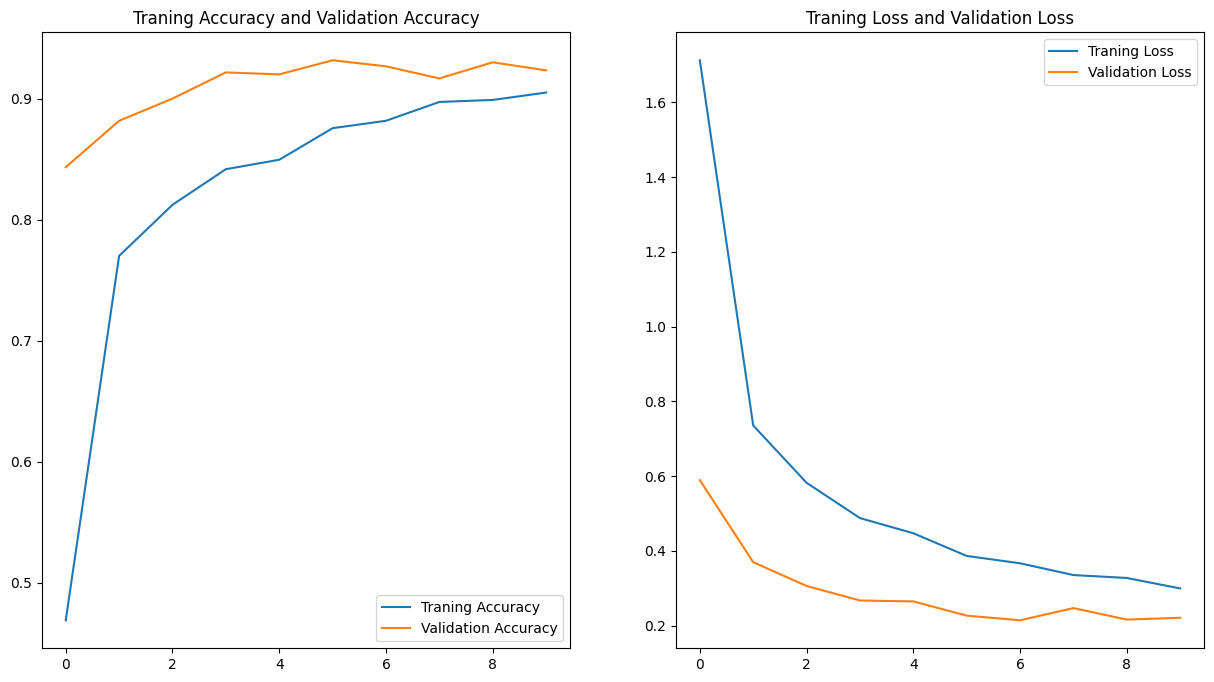

In [64]:
epochs_range=range(10)
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Traning Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc="lower right")
plt.title("Traning Accuracy and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Traning Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc="upper right")
plt.title("Traning Loss and Validation Loss")


In [65]:
model.evaluate(X_test,y_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9153 - loss: 0.2388


[0.2179652601480484, 0.9300000071525574]

In [66]:
y_pred= model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step


In [67]:
y_pred

array([[4.1896012e-02, 1.8885115e-05, 3.0054118e-06, ..., 2.8783191e-08,
        8.2860730e-05, 1.1736169e-07],
       [4.7528893e-03, 9.8774731e-01, 1.5506499e-05, ..., 2.1393916e-04,
        8.7398468e-05, 2.6903192e-06],
       [2.3014141e-05, 3.1219614e-08, 1.0692356e-07, ..., 9.3447616e-10,
        5.0358710e-07, 9.9547792e-09],
       ...,
       [6.2564708e-04, 1.7165093e-04, 1.6320278e-06, ..., 3.6441972e-05,
        4.8044544e-02, 1.8980870e-07],
       [9.8638907e-07, 8.1453624e-07, 1.2988630e-07, ..., 1.8552864e-08,
        1.6009797e-05, 9.1772195e-10],
       [2.1060834e-04, 1.2153836e-04, 9.9025834e-01, ..., 1.1365624e-05,
        6.7064627e-07, 4.0409896e-03]], dtype=float32)